# Principal Component Analysis 
is basically a statistical procedure to convert a set of observation of possibly correlated variables into a set of values of linearly uncorrelated variables.
Each of the principal components is chosen in such a way so that it would describe most of the still available variance and all these principal components are orthogonal to each other. In all principal components firstprincipal component has maximum variance.

# Uses of PCA:
•	It is used to find inter-relation between variables in the data.
•	It is used to interpret and visualize data.
•	As number of variables are decreasing it makes further analysis simpler.
•	It’s often used to visualize genetic distance and relatedness between populations.

# Objectives of PCA:
•	It is basically a non-dependent procedure in which it reduces attribute space from a large number of variables to a smaller number of factors.
•	PCA is basically a dimension reduction process but there is no guarantee that the dimension is interpretable.
•	Main task in this PCA is to select a subset of variables from a larger set, based on which original variables have the highest correlation with the principal amount.

# Principal Axis Method: 
PCA basically search a linear combination of variables so that we can extract maximum variance from the variables. Once this process completes it removes it and search for another linear combination which gives an explanation about the maximum proportion of remaining variance which basically leads to orthogonal factors. In this method, we analyze total variance.

# Eigenvector:
It is a non-zero vector that stays parallel after matrix multiplication. Let’s suppose x is eigen vector of dimension r of matrix M with dimension r*r if Mx and x are parallel. Then we need to solve Mx=Ax where both x and A are unknown to get eigen vector and eigen values.
Under Eigen-Vectors we can say that Principal components show both common and unique variance of the variable. Basically, it is variance focused approach seeking to reproduce total variance and correlation with all components. The principal components are basically the linear combinations of the original variables weighted by their contribution to explain the variance in a particular orthogonal dimension.

# Eigen Values:
It is basically known as characteristic roots. It basically measures the variance in all variables which is accounted for by that factor. The ratio of eigenvalues is the ratio of explanatory importance of the factors with respect to the variables. If the factor is low then it is contributing less in explanation of variables. In simple words, it measures the amount of variance in the total given database accounted by the factor. We can calculate the factor’s eigen value as the sum of its squared factor loading for all the variables.
Now, Let’s understand Principal Component Analysis with Python



# Step 1:
Importing the libraries

In [1]:
# importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 


# Step 2: Importing the data set
Import the dataset and distributing the dataset into X and y components for data analysis.


In [2]:
# importing or loading the dataset 
from sklearn.datasets import load_wine

features, target = load_wine(return_X_y=True)
  
# distributing the dataset into two components X and Y 
X = features
y = target


In [3]:
X.shape

(178, 13)

In [4]:
y.shape

(178,)

# Step 3: 
Splitting the dataset into the Training set and Test set

In [5]:
# Splitting the X and Y into the 
# Training set and Testing set 
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 


In [6]:
X_train.shape

(142, 13)

In [7]:
print(X_train[0:5,: ])

[[1.369e+01 3.260e+00 2.540e+00 2.000e+01 1.070e+02 1.830e+00 5.600e-01
  5.000e-01 8.000e-01 5.880e+00 9.600e-01 1.820e+00 6.800e+02]
 [1.269e+01 1.530e+00 2.260e+00 2.070e+01 8.000e+01 1.380e+00 1.460e+00
  5.800e-01 1.620e+00 3.050e+00 9.600e-01 2.060e+00 4.950e+02]
 [1.162e+01 1.990e+00 2.280e+00 1.800e+01 9.800e+01 3.020e+00 2.260e+00
  1.700e-01 1.350e+00 3.250e+00 1.160e+00 2.960e+00 3.450e+02]
 [1.340e+01 3.910e+00 2.480e+00 2.300e+01 1.020e+02 1.800e+00 7.500e-01
  4.300e-01 1.410e+00 7.300e+00 7.000e-01 1.560e+00 7.500e+02]
 [1.350e+01 1.810e+00 2.610e+00 2.000e+01 9.600e+01 2.530e+00 2.610e+00
  2.800e-01 1.660e+00 3.520e+00 1.120e+00 3.820e+00 8.450e+02]]


# Step 4: Feature Scaling
Doing the pre-processing part on training and testing set such as fitting the Standard scale


In [8]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)


# Step 5: Applying PCA function
Applying the PCA function into training and testing set for analysis.


In [22]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2) 
X_train = pca.fit_transform(X_train) 
#fit function is used for finding mean and Std
#transform function is used for autoscaling of recently computed mean and std
#fit_transform function does both function at one line
# we will apply fit_transform only for X_training set because we need to compute mean and std, 
#and then use it to autoscale the data.
X_test = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_ 
#The explained variance ratio is the percentage of variance that is attributed by each of the 
#selected components. Ideally, you would choose the number of components to include in your 
#model by adding the explained variance ratio of each component until you reach a total of 
#around 0.8 or 80% to avoid overfitting
print("PC1 stored information percentage:", explained_variance[0]*100,"%")
print("PC2 stored information percentage:", explained_variance[1]*100,"%")

PC1 stored information percentage: 65.6271641605816 %
PC2 stored information percentage: 34.3728358394184 %


In [68]:
X_train.shape

(142, 2)

# Step 6: 
Fitting Logistic Regression To the training set

In [81]:
# Fitting Logistic Regression To the training set 
from sklearn.linear_model import LogisticRegression   
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 
# Predicting the test set result using 
# predict function under LogisticRegression 
y_pred = classifier.predict(X_test)

# Step 7
Make Confusion Matrix

In [83]:
# making confusion matrix between 
# test set of Y and predicted value. 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


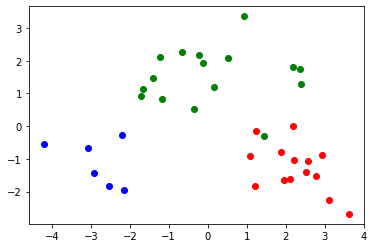

In [86]:
from matplotlib.colors import ListedColormap 
y_set=y_test
X_set=X_test
for i, j in enumerate(np.unique(y_set)): 
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 


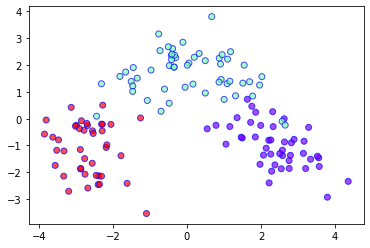

In [14]:
#test data visualiztion
plt.scatter(X_train[:,0], X_train[:,1],c=y_train, cmap='rainbow', alpha=0.7, edgecolors='b')



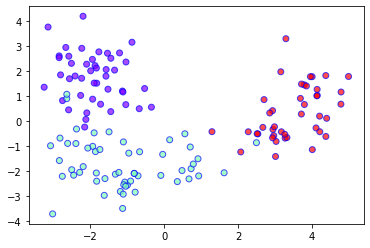

In [87]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
plt.scatter(X_train[:,0], X_train[:,1],c=y_train, cmap='rainbow', alpha=0.7, edgecolors='b')

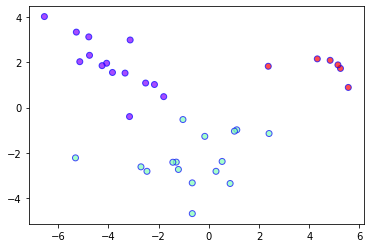

In [10]:
plt.scatter(X_test[:,0], X_test[:,1],c=y_test, cmap='rainbow', alpha=0.7, edgecolors='b')



In [11]:
# Fitting Logistic Regression To the training set 
from sklearn.linear_model import LogisticRegression   
  
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 

/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# Predicting the test set result using 
# predict function under LogisticRegression 
y_pred = classifier.predict(X_test)
# making confusion matrix between 
# test set of Y and predicted value. 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
